In [1]:
%pylab inline
from state.map import X_MAX, Y_MAX, ARENA_WALLS 
from math import sqrt
from math import pi
import state.particle_filtering

Populating the interactive namespace from numpy and matplotlib


In [13]:
# Generate empty space with right dimensions

def gen_lines():
    lines = []
    for wall in ARENA_WALLS:
        start = wall[0]
        delta = wall[1]

        end = np.add(start, delta)

        line_xs = []
        line_ys = []

        line_xs.append(start[0])
        line_xs.append(end[0])
        line_ys.append(start[1])
        line_ys.append(end[1])

        lines.append(Line2D(line_xs, line_ys, linewidth=2))
        
    return lines 

def plot(particles, robot_location):
    dpi = 80
    width = X_MAX / dpi;
    height = Y_MAX / dpi;
    figure = plt.figure(figsize=(width,height))

    ax = figure.add_subplot(1,1,1)

    ax.set_ylim(top=Y_MAX, bottom=0)
    ax.set_xlim(right=X_MAX, left=0)

    lines = gen_lines()
    for line in lines:
        ax.add_line(line)

    transpose = particles.data.T    
    
    ax.quiver(transpose[0], transpose[1], np.sin(transpose[2]), np.cos(transpose[2]), pivot='mid')
    
    x, y, o = particles.get_position_by_weight()
    ax.plot(x, y, 'ro')
    ax.plot(robot_location[0],robot_location[1], 'bo')

    return figure

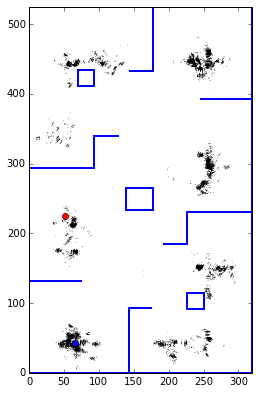

In [152]:
figure = plot(particles, robot.location())
plt.show(figure)

In [119]:
reload(state.particle_filtering)
particles = state.particle_filtering.Particles(n=25000)
robot = state.particle_filtering.Robot(70, 70, 0)

In [ ]:
for i in xrange(1):
    factor = -4/3
    robot = robot.rotate(pi/factor)
    particles.rotate_all(pi/factor)
    particles.sense(robot.measurement_prediction())
#     distance = 10.0
#     robot = robot.forward(distance)
#     particles.forward_all(distance)
#     particles.sense(robot.measurement_prediction())

In [124]:
particles.data

array([[ 310.        ,  119.625     ,    4.9375    ],
       [  60.15625   ,  113.        ,    1.40332031],
       [  52.5625    ,  398.25      ,    6.25390625],
       ..., 
       [ 289.        ,   55.8125    ,    1.48925781],
       [ 197.5       ,   27.0625    ,    5.6953125 ],
       [ 148.25      ,  385.        ,    3.21484375]], dtype=float16)

In [129]:
particles.weights

array([  2.46887207e-02,   1.03187561e-03,   4.04119492e-05, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [145]:
robot.measurement_prediction()

{'IR_front': 73.524301353135414, 'IR_right': 75.56496449754529}

In [149]:
robot 

[x=66.00434 y=42.44765 orient=3.30696]

In [151]:
particles.resample()